In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Choosing a Sample Size (Review)
In the previous lecture, we saw that confidence interval gets smaller as we increase sample size. "Is there a way to find out how large of a sample size we need to obtain a confidence interval of a certain width?"

## Width of 95% Confidence Interval
The CLT says that the distribution of a sample proportion (or sample `mean`) is roughly normal, centered at population proportion / `mean`.

It turns out that the confidence interval uses the same distribution as the CLT's. Thus, the CLT says that when we create a 95% confidence interval, the distribution of values that we take the middle 95% from is roughly normal. 

1. Because it's normal, the 95% confidence interval consists of the center of the distribution $\pm$ 2 `SD`s of the sample proportion. 
2. The total width of the confidence interval is 4 `SD`s (`2` on left side + `2` on right side) of the sample proportion
    * Suppose we want the total width of the confidence interval to be smaller than some number, then make `4` $\times$ `SD` small
    * Recall that `SD` of sample proportion (or `mean`) can be calculated by the following,
    
\begin{equation*}
sample`mean`SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

If we want to calculate for total width,

\begin{equation*}
4 \times sample`mean`SD = 4 \times \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

Based on the formula above, if we quadruple the sample size, then the total width will decrease by a factor of `2`.

Recall from previous lecture, we wanted the width of the interval to be less than or equal to 3%. We used the formula to and plug the `4` $\times$ `SD` to be 0.03, and wrote the formula so that,
\begin{equation*}
{{4 \times} \frac{population`SD}{\sqrt{sample`size}} \le 0.03}
\end{equation*}

From above, we can solve for the `sample size` required to obtain a small interval. Ideally, we want know the `sample size` first before we go out and take samples to make sure the confidence interval is as small as desired. 

Rearranging the formula above to solve for `sample size`, we obtain the following,
\begin{equation*}
sample`size \ge (\frac{4 \times population`SD}{0.03})^2
\end{equation*}

## Bound the 0-1 Population `SD`
1. With the equation above, we want to solve for `sample size`. However, we don't know the population `SD`.
2. If a population consists of `0`s and `1`s, the `SD` will never be greater than `0.5`.
    * This is a key fact since it allows us to plug in `0.5` to the `population SD` above.
3. Solving for sample size, we obtained `4,445`

This is the whole process of choosing a sample size to make sure that the confidence interval is some width. The `SD` of any population that only has 2 choices is $\le$ `0.05` if we take the 2 choices mark one of the choices with `1` and the other with `0`. 

## A Familiar Discussion Question
We want to estimate what % of voters will vote for Candidate A in an upcoming selection. How many opinions should we sample at random in order to obtain a 95% confidence interval with a width of `3%` or less?

This is the same question as the one we went through on previous lecture. However, this time we will go through it by ourselves.

To solve this problem, we treat opinions as 2 categories:
1. People who voted for Candidate A, indicated as `1`
2. People who didn't vote for Candidate A, indicated as `0`

Thus, if we collect a sample of opinions, we'll obtain a dataset of `0`s and `1`s.

If we have a dataset that contains only `0`s and `1`s, the greatest population `SD` that we can have is `0.5`. W

Now recall the CLT theorem that the distribution of a sample proportion is roughly normal, centered at the population `mean`. With a normal distribution, 
1. The 95% confidence interval is the `mean` $\pm$ 2 `SD`. 
2. The total width is 4 `SD` (2 `SD` from left side of the center + 2 `SD` from the right side of the center).

Recall we have the following formula,

\begin{equation*}
\texttt{sample mean SD} = \frac{\text{population SD}}{\sqrt{\text{sample size}}}
\end{equation*}

The total width of the interval is 4 $\times$ `SD` of `sample mean`. Thus, we can rewrite the formula to be the following,

\begin{equation*}
\texttt{total width interval} = 4 \times \text{sample mean SD} =  4 \times\frac{\text{population SD}}{\sqrt{\text{sample size}}}
\end{equation*}

We want the total interval width to be less than `0.03`. If we have a dataset that contains only `0`s and `1`s, the greatest population `SD` that we can have is `0.5`. We can assume worst case, and if it turns out that the actual `SD` is less than `0.5`, we can easily adjust the calculation.

\begin{equation*}
{4 \times\frac{0.5}{\sqrt{\text{sample size}}} \le 0.03}
\end{equation*}

Solving for the sample size, we can obtain the following,
\begin{equation*}
\text{sample size} = (\frac{4 \times 0.5 }{0.03})^2
\end{equation*}


In [2]:
(4 * 0.5 / 0.03) ** 2

4444.444444444445

It is recommended to grasp the underlying concept of the problem above. We can try solving the same problem with different numbers (e.g. different width, different confidence interval). 

# Prediction
So far, we have discussed about inference and a little building blocks for prediction. Now we will introduce about Prediction.

## Prediction Problems
If we know one characteristic, we can predict another characteristic. Some examples:
1. Given my height, how tall will I be next year?
2. Given my height, how tall will my kid be as an adult?

We can also predict seemingly unrelated things such as:
3. Given my height, how much will I spend on a boat?

Every question above has 2 characteristics: known and unknown. We try to use what we know to predict what we don't know.

Another key basic assumption of predictions is that for some sample we know all the characteristics. For example, we have prior data of parents' heights and kids heights. Based on these trends that we observed before, we can try predict the future. Without this prior knowledge / data, we won't be able to do much about the future. 

The only way we can good prediction is if the 2 characteristics are correlated. Correlation in this case is association. If there's no relationship between **my current height** and **how tall will I be next year**, we will never be able to predict **how tall I will be next year**. Thus, prediction uses the assumption that we need 2 variables to be correlated or associated with each other. This way, we can make prediction.

# Correlation
## Relation Between 2 Variables
There are some terms that we need to clarify. 

**Association**: If we change `1` variable, does the other variable changes as well? If we change my height, will I tend to have taller kids?

We've seen this term when we talked about hypothesis testing. We used hypothesis testing to establish an `association`.

**Trend**: Sometimes we also want to know the trend. So whether the trend is **positive association** (e.g. if we increase height my height, the height of my kids will go up) or **negative association** (if I smoke, the weight of my babies decrease). 

**Pattern**: We also want to know the shape or pattern of the relationship. 
* In this case, pattern is more of a subjective term. In this case, it means any discernible (distinguishable, recognizeable) shape
    * Typically, to look for a pattern in the data, in the case where we have 2 sets of numerical data (e.g. parents' heights and kids heights), use a scatter plot
* In this class, the patterns that we focus on are **linear** (looks like a line) or **non-linear** (any other shape)

In general, when we do prediction, we always want to **visualize first**, then **quantify**.
* Before we compute any of the numbers, we visualize the data first. This is because usually that will give us a hint on what to do

## Demo
Below we have a dataset of hybrid car sales.
1. `msrp` = manufacturet set price in US Dollar
2. `acceleration` in miles/sec

In [3]:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


Is there a relationship between `acceleration` and how much we pay for (`msrp`)? We can try looking at the scatter plot between those data,

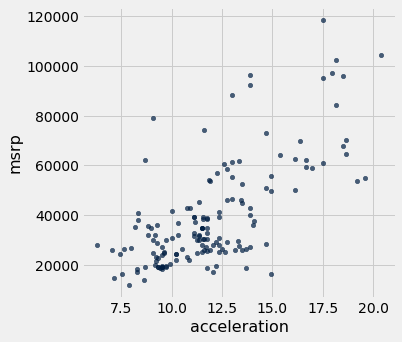

In [4]:
hybrid.scatter('acceleration', 'msrp')

Above, we can see a somewhat positive trend. As the acceleration goes up, the cost increases. However, it's a little difficult to see whether the correlation is linear.

How about `mpg` vs. `msrp`?

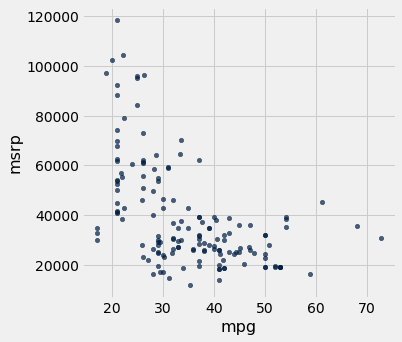

In [5]:
hybrid.scatter('mpg', 'msrp')

We pay more for the cars that are less efficient! We see a negative association with the plot above. 

It turns out most of the cars that has low price and high `mpg` are smaller cars, while the more expensive ones are bigger (i.e. SUV) cars that have less `mpg`.

If we go back to the `hybrid` table,

In [6]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


We can filter the table so that it only looks at SUVs. Below we are analyzing the scatter plot of `mpg` vs. cost,

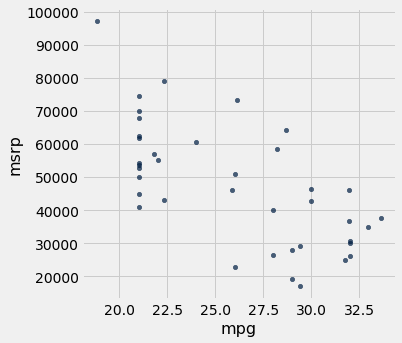

In [7]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

Notice in the above plot that `mpg` range is smaller compared to when we plot the whole dataset. On the same time, the correlation somewhat looks linear! 

We can compare the `mpg` vs `msrp` plot above with the `acceleration` vs `msrp` plot for SUV only,

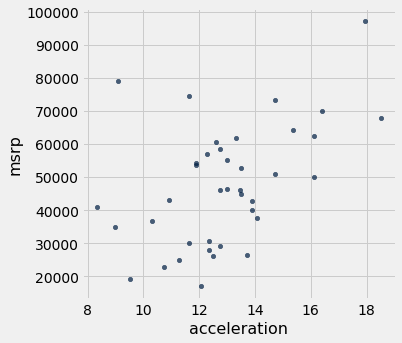

In [8]:
suv.scatter('acceleration', 'msrp')

Above, the relationship between `acceleration` and `msrp` looks somewhat linear. 

Now we'll compare `msrp` with `mpg`. It is difficult to compare them directly since they have different units. To obtain a better comparison, we can convert the units to standard units. 

Recall that the standard unit `z` can be calculated by the following,
\begin{equation*}
z = \frac{value - mean}{SD}
\end{equation*}

Let's say we are going to convert the `msrp` of the SUV to standard units. 

In [9]:
suv.column('msrp')

array([36676.1 , 58521.14, 29186.21, 19322.56, 34772.4 , 42924.35,
       46229.48, 24823.83, 57094.81, 22938.33, 78932.81, 46233.36,
       60519.83, 97237.9 , 26408.67, 44903.77, 41033.24, 64198.95,
       37510.86, 17045.06, 73183.47, 27968.32, 30194.95, 42812.54,
       55164.33, 30661.34, 26213.09, 67902.28, 50149.39, 52626.77,
       46310.  , 40170.  , 50900.  , 69850.  , 62575.  , 74425.  ,
       53620.  , 54145.  , 61960.  ])

Start with taking the `mean` and the `SD` of the `msrp`,

In [10]:
mean = np.mean(suv.column('msrp'))
sd = np.std(suv.column('msrp'))
mean, sd

(47624.23435897436, 17981.965417645933)

Now we can convert each value to standard unit `z`,

In [11]:
(suv.column('msrp') - mean) / sd

array([-0.6088397 ,  0.6059908 , -1.02536202, -1.57389216, -0.71470688,
       -0.26136656, -0.07756407, -1.26795953,  0.52667077, -1.37281458,
        1.74110977, -0.07734829,  0.7171405 ,  2.75907914, -1.17982456,
       -0.15128849, -0.36653359,  0.92174105, -0.56241763, -1.70054683,
        1.42138165, -1.09309043, -0.9692647 , -0.26758445,  0.41931432,
       -0.94332816, -1.19070101,  1.12768795,  0.14042712,  0.27819738,
       -0.07308625, -0.41453947,  0.1821695 ,  1.23600314,  0.83143112,
        1.49042471,  0.33343216,  0.36262808,  0.79723019])

Above, the 3rd value is `-1.02536`, meaning this original price is about `1.025` `SD` below the average cost. 

Let's make the conversion into a function! `nums` as the input is an array of numbers.

In [12]:
def standard_units(nums):
    mean = np.mean(nums)
    sd = np.std(nums)
    return (nums - mean) / sd

In [13]:
standard_units(suv.column('msrp'))

array([-0.6088397 ,  0.6059908 , -1.02536202, -1.57389216, -0.71470688,
       -0.26136656, -0.07756407, -1.26795953,  0.52667077, -1.37281458,
        1.74110977, -0.07734829,  0.7171405 ,  2.75907914, -1.17982456,
       -0.15128849, -0.36653359,  0.92174105, -0.56241763, -1.70054683,
        1.42138165, -1.09309043, -0.9692647 , -0.26758445,  0.41931432,
       -0.94332816, -1.19070101,  1.12768795,  0.14042712,  0.27819738,
       -0.07308625, -0.41453947,  0.1821695 ,  1.23600314,  0.83143112,
        1.49042471,  0.33343216,  0.36262808,  0.79723019])

What will we see if we create a scatter plot of `msrp` and its standard units?

In [14]:
a = Table().with_columns(
    'MSRP', suv.column('msrp'),
    'MSRP (su)', standard_units(suv.column('msrp'))
)
a

MSRP,MSRP (su)
36676.1,-0.60884
58521.1,0.605991
29186.2,-1.02536
19322.6,-1.57389
34772.4,-0.714707
42924.3,-0.261367
46229.5,-0.0775641
24823.8,-1.26796
57094.8,0.526671
22938.3,-1.37281


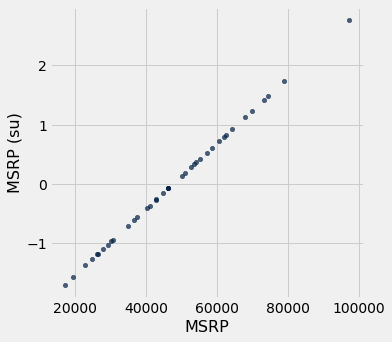

In [15]:
a.scatter('MSRP', 'MSRP (su)')

We obtain a linear correlation! 

Every `MSRP` has a corresponding number in standard units. When we convert to standard units, we can see that for every certain increase of `x`, there's a same increase of `y`. If the `MSRP` increases by 10k, the `(su)` increases by `0.5`. 

Notice that most of the data points are close to `0` `MSRP`. The key idea of standard units is that when we converted the data from `msrp` to `(su)`, we took our data, moved it so that the center of the data is at `0`, and either shrinked or stretched it so that the `SD` is `1`. If we do this for both `msrp` and `mpg`, both sets of data will be centered at `0`, with `SD` of `1`. This way, it will be easier to compare them next to each other. 

### Are half of the points above `0` and half below `0`? 
If we want a number where half of the data are above while half or the data are below, we are looking at the `median`. The `mean` is going to be `0` since we convert the data to standard units.

In the plot, notice there are data points that are up high around the top right area. From here, chances are the `mean` is going to be greater than the `median`. The `median` is probably lower than `0`. 

Let's find out the proportion of data points are above `0` and 

In [16]:
np.count_nonzero(standard_units(suv.column('msrp')) > 0) / a.num_rows

0.46153846153846156

There are less data points that are above `0` compared to the data points that are below `0`! This means the `median` is indeed below `0`! 

Below we have a function that given a table, will convert all the columns in standard units. 

In [17]:
def standardize(t):
    #t_su is initially an empty table, but for each for loop execution, it will add a column
    # with standard units
    t_su = Table()
    for label in t.labels: # Iterate through all the column labels in `t`
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

Recall our `suv` table, 

In [18]:
suv

vehicle,year,msrp,acceleration,mpg,class
Escape,2004,36676.1,10.32,31.99,SUV
Lexus RX400h,2005,58521.1,12.76,28.23,SUV
Highlander,2005,29186.2,12.76,29.4,SUV
Escape 2WD,2005,19322.6,9.52,29,SUV
Mercury Mariner,2006,34772.4,8.98,32.93,SUV
Chevrolet Tahoe,2007,42924.3,10.91,22.35,SUV
Kluger,2007,46229.5,12.76,25.87,SUV
Tribute,2007,24823.8,11.28,31.75,SUV
GMC Yukon,2007,57094.8,12.28,21.78,SUV
Vue,2007,22938.3,10.75,26,SUV


If we're only interested in `mpg` and `msrp` from the `suv` table, we can:
1. Create separate table that consists of only `mpg` and `msrp`, then 
2. Pass in that separate table to the function `standardize`

In [19]:
suv.select('mpg', 'msrp')

mpg,msrp
31.99,36676.1
28.23,58521.1
29.4,29186.2
29,19322.6
32.93,34772.4
22.35,42924.3
25.87,46229.5
31.75,24823.8
21.78,57094.8
26,22938.3


In [20]:
standardize(suv.select('mpg', 'msrp'))

mpg (su),msrp (su)
1.31784,-0.60884
0.48955,0.605991
0.747288,-1.02536
0.659172,-1.57389
1.52491,-0.714707
-0.805749,-0.261367
-0.0303321,-0.0775641
1.26497,-1.26796
-0.931314,0.526671
-0.00169453,-1.37281


Now we'll create a scatter plot with `mpg` on the `x` axis and `msrp` on the `y` axis,

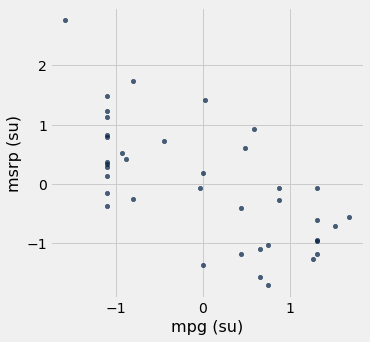

In [21]:
standardize(suv.select('mpg', 'msrp')).scatter(0, 1)

Recall that with Chebyshev's Inequality, the majority of the data points should be covered within `5` `SD` from `0`. We could have changed the limits of the scatter plot above to be from `-5` to `5`. However, in this case, most of our data points are between `-3` and `3`. Thus, we will adjust the plot so that the limit is from `-3` to `3` instead.

(-3, 3)

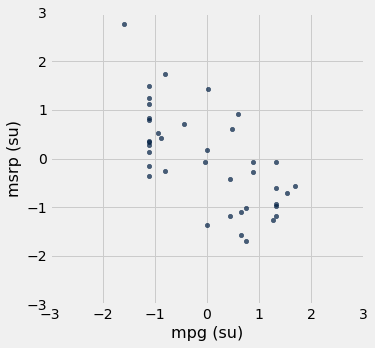

In [22]:
standardize(suv.select('mpg', 'msrp')).scatter(0, 1)
plt.xlim(-3, 3) # Change the x-axis limits
plt.ylim(-3, 3) # Change the y-axis limits

If we compare the plot of the standardized units with the plot of `mpg` and `msrp` without the standardized units,

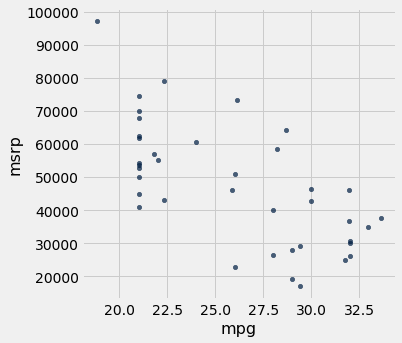

In [23]:
suv.scatter('mpg', 'msrp')

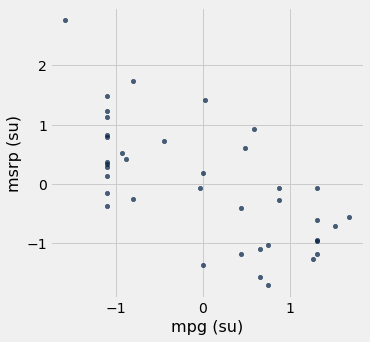

In [24]:
standardize(suv.select('mpg', 'msrp')).scatter(0, 1)

They look the same! Once again, when we convert our data to standard units, we don't move points away from each other. We only took the data points and moved them so that the center is `0`.

We can do the same thing with `acceleration` vs `msrp`,

(-3, 3)

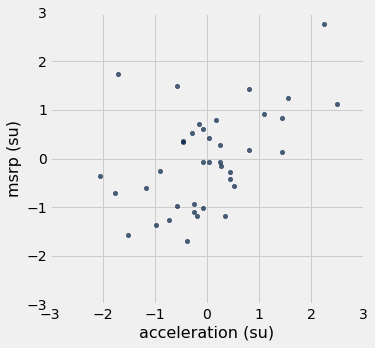

In [25]:
standardize(suv.select('acceleration', 'msrp')).scatter(0, 1)
plt.xlim(-3, 3) # Change the x-axis limits
plt.ylim(-3, 3) # Change the y-axis limits

If we compare the plot above with the plot with original units,

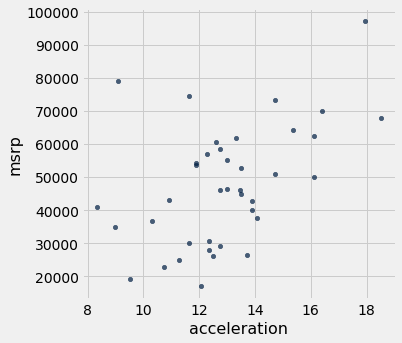

In [26]:
suv.scatter('acceleration', 'msrp')

We can see that the 2 plots above's relationship is about the same.

The center of the standardized unit plot is `0`. This will be important later.

The basic idea is that we are doing this because the 2 axes were previously in different units (e.g. dollars, miles/s). When we convert them to standard units, 
<img src = 'point.jpg' width = 400/>

the point marked red above is both `1` `SD` away from the average acceleration and `1` `SD` away from the average cost. This lets us compare both axes.

# Correlation Coefficient
Previously, we saw scatter plots that analyzed the relationship between different variables. Sometimes we obtain positive slope relationship, sometimes negative. Turns out there is a number (a statistic) that indicates linear relationships. This number is called **Correlation Coefficient**, otherwise known as **`r`**.

## The Correlation Coefficient `r`
1. `r` is a number that measures linear association. It measures:
    * Whether the data are shaped like a perfect curve or parabola or etc.
    * It only measures how well the data fit onto a line, so only linear relationships

2. `r` is based on standard units.

3. The possible range for `r` is:
\begin{equation*}
-1 \le r \le 1
\end{equation*}

* `r` = `1`  : Scatter plot is perfectly straight line (all the points are in a straight line) with positive (upwards) slope
* `r` = `-1` : Scatter plot is perfectly straight line with negative (downwards) slope
* If `r` is somewhere in between, depending what `r` is, there can be a linear relationship, or weak linear relationship, or no linear relationship at all. The points would not be on a perfect straight line
    * `r` = 0 : No linear association. The data points are **uncorrelated** to each other
        * This means knowing one variable doesn't help with figuring out the other variable

## Demo
Below is demo to illustrate `r`. This is a plot of points that have a correlation (`r`) of `0`. 

In [27]:
def r_scatter(r):
    """ Generate a scatter plot with a correlation approximation of 0"""
    plt.figure(figsize = (5, 5) )
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r * x + (np.sqrt(1 - r**2)) * z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()

In [28]:
_ = interact(r_scatter, r = (-1, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0, min=-1.0), Output()), _dom_classes=('wi…

This means even if we go from `0` to `2` or `0` to `-2`, it doesn't help with figuring out what `y` could be. With this uncorrelated points, even if we know `x`, we don't know what `y` is. 

If we change `r` to `1`, all the points will fall on a straight upwards slope line. If we change `r` to `-1`, all the points will fall on a straight downwards slope line.

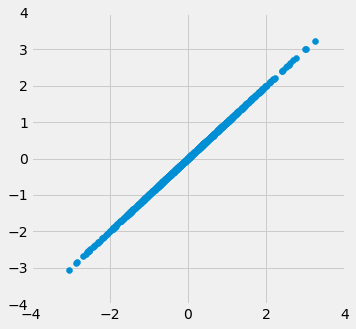

In [29]:
r_scatter(1)

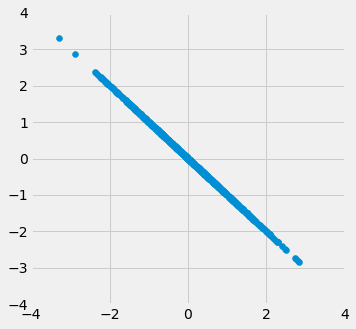

In [30]:
r_scatter(-1)

As the `r` moves from `-1` to somewhere in between `-1` to `0`, the data points become more dispersed.

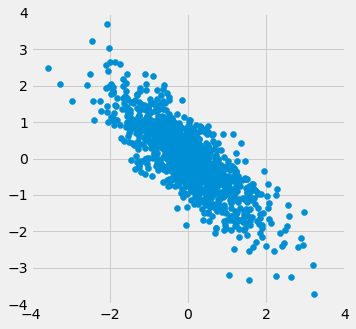

In [31]:
r_scatter(-0.8)

Different values of `r` desribes different types of plots. 

## Calculating `r`
Below we have a table with `x`s and `y`s.

In [32]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
    'x', x,
    'y', y
)
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


Below is a scatter plot of the table above,

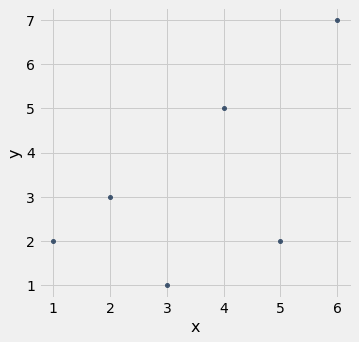

In [33]:
t.scatter(0, 1)

It appears there's a somewhat linear relationship. Knowing the value of `r` would help in determining how strong the linear relationship is.

First of all, we'll convert the units of `x` and `y` to standardized units,

In [34]:
t_standard = standardize(t)
t_standard

x (su),y (su)
-1.46385,-0.648886
-0.87831,-0.162221
-0.29277,-1.13555
0.29277,0.811107
0.87831,-0.648886
1.46385,1.78444


Then we calculate the product of `x` and `y`, 

In [35]:
t_standard.column(0) * t_standard.column(1)

array([ 0.94987138,  0.14248071,  0.33245498,  0.23746785, -0.56992283,
        2.6121463 ])

And let's add the data above to the previous table,

In [36]:
t_standard.with_column(
    'product', t_standard.column(0) * t_standard.column(1)
)

x (su),y (su),product
-1.46385,-0.648886,0.949871
-0.87831,-0.162221,0.142481
-0.29277,-1.13555,0.332455
0.29277,0.811107,0.237468
0.87831,-0.648886,-0.569923
1.46385,1.78444,2.61215


The correlation `r` is the `mean` of the `product`

In [37]:
np.mean(t_standard.column(0) * t_standard.column(1))

0.6174163971897709

Above, our `r` is `0.617`. It's not `1` since the points are not on a straight line. Not `0` either since the points are not just random clouds. It indeed shows a positive trend since `0.5` $\le$ `r` $\le$ `1`.

## Definition of `r`
<img src = 'correlation.jpg' width = 500/>

`r` measures how clustered the scatter is around a straight line.

We can create a function that calculates `r`. Below the function `correlation` that takes in a table `t`, the desired label columns `x` and `y`, and calculates the correlation coefficient `r` between the 2 columns.

In [41]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

In [42]:
correlation(t, 'x', 'y')

0.6174163971897709

Recall the `suv` plot with `acceleration` and `msrp`.

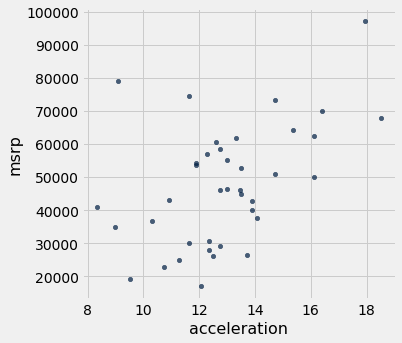

In [43]:
suv.scatter('acceleration', 'msrp')

We can somewhat see a positive linear relationship. To confirm, we can use the `correlation` function to calculate the `r` and see if we obtain a positive value.

In [45]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

And indeed, we obtain a positive value! Now recall the scatter plot of `mpg` and `msrp`

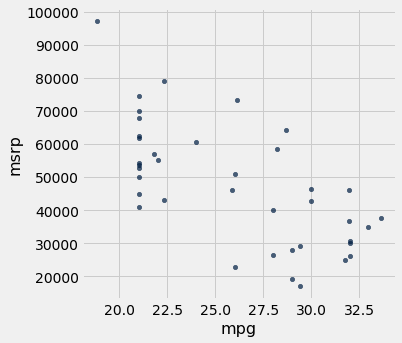

In [46]:
suv.scatter('mpg', 'msrp')

We can see a somewhat negative linear relationship above. Let's confirm by calculating `r` and see if we will obtain a negative value.

In [47]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

And indeed, the correlation is negative! 

Recap what we have done so far. Before we can do any prediction, we need to figure out whether there's any relationship between 2 variables. We have some methods to determine such relationship, and the correlation coefficient `r` is one way we can describe the linear relationship between 2 numerical variables. `r` gives us a measure of how correlated 2 variables are. The more correlated 2 variables are, the easier it will be to predict.

Note that the variables need to be numerical. We can't use `r` for categorical data, since we can't convert the standard units to something non-numerical (e.g. S, M, L, XL). 

Recall the following,

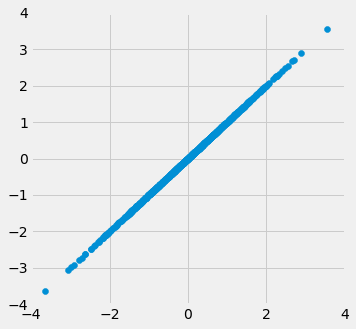

In [48]:
r_scatter(1)

Given some value of `x`, we want to know the value of `y`. If the 2 variables are perfectly correlated like the plot above, we can figure out for certain what `y` will be. On the other hand, if the correlation is hardly correlated like below

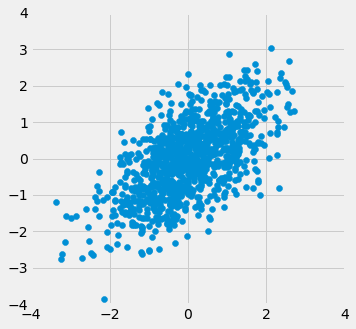

In [50]:
r_scatter(0.6)

Given `x`, we are less certain of where `y` can be. 